#### Run of CNN_model_v3 with partially augmented train-test data

##### Input data 
train-test: N=10000 each --- b_1000 + aug_b_9000 || nb_10000   
holdout: b_400 || nb_4000

##### -- Also tried further training post epoch 20

#### refs  
- REF: http://localhost:8888/notebooks/REFS_and_LINKS.ipynb     


- ref: http://localhost:8888/notebooks/load_Imgs_runtestCNN_v1.ipynb
- ref: http://localhost:8888/notebooks/load_Imgs_BuildTrainTestarrays_v2.ipynb   


- nohup ipython notebook 

#### General REQs

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

In [2]:
# !pwd
# path='/Users/hrm/Documents/Dropbox/DSrelated/DG_datachallenge'
path = '/home/ubuntu/pynb/DG_datachallenge'

#### LOAD Image Arrays

In [6]:
# LOAD saved vars


# Xtrain=np.load(path+'/building_set/TrainX_v0'+'.npy')
# Ytrain=np.load(path+'/building_set/TrainY_v0'+'.npy')
# # print(Xtrain.shape, Ytrain.shape)


# Xtest=np.load(path+'/building_set/TestX_v0'+'.npy')
# Ytest=np.load(path+'/building_set/TestY_v0'+'.npy')
# # print(Xtest.shape, Ytest.shape)


# LARGE files....
# X_all = np.load(path+'/building_set/X_all'+'.npy')
# Y_all = np.load(path+'/building_set/Y_all'+'.npy')
# print(X_all.shape, Y_all.shape)


###
# X_all = np.load(path+'/building_set/X_ubdnb6000_all'+'.npy')
# Y_all = np.load(path+'/building_set/Y_ubdnb6000_all'+'.npy')


####
# X_all = np.load(path+'/building_set/X_traintest_all'+'.npy')
# Y_all = np.load(path+'/building_set/Y_traintest_all'+'.npy')
# traintestFileIdx_all=pd.read_csv(path+'/building_set/XY_traintest_all.csv', index_col=0)
# 

# XHold = np.load(path+'/building_set/X_holdout_all'+'.npy')
# YHold = np.load(path+'/building_set/Y_holdout_all'+'.npy')
# print(XHold.shape, YHold.shape)
# 




In [4]:
print(X_all.shape, Y_all.shape)

(20000, 256, 256, 3) (20000, 2)


In [7]:
### Include all images
from sklearn.model_selection import train_test_split

# Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_all, Y_all, 
#                                                 test_size=0.2, 
#                                                 random_state=9988, 
#                                                 stratify=Y_all)

train1,test1 = train_test_split(traintestFileIdx_all, test_size=0.2, stratify=traintestFileIdx_all.Blabel)


In [ ]:
## Need to save train1 & test1 ..... =S

In [8]:
Xtrain = X_all[train1.index.tolist(),:,:,:]
Xtrain.shape

(16000, 256, 256, 3)

In [9]:
Xtest = X_all[test1.index.tolist(),:,:,:]
Xtest.shape

(4000, 256, 256, 3)

In [11]:
Ytrain = Y_all[train1.index.tolist()]
Ytrain.shape

(16000, 2)

In [12]:
Ytest = Y_all[test1.index.tolist()]
Ytest.shape

(4000, 2)

In [13]:
def convertKerasY21Darray(kerasY):
    return np.argmax(kerasY,axis = 1)

In [14]:
pd.DataFrame(convertKerasY21Darray(Ytest), columns=['label']).label.value_counts()

1    2000
0    2000
Name: label, dtype: int64

### DNN  ---------------------------------

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, ZeroPadding2D
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, rmsprop

# from keras.layers import merge
# from keras.layers.core import Lambda
# from keras.models import Model

# from keras import backend as K
# import tensorflow as tf


Using TensorFlow backend.


In [16]:
#model_v0: [32,32 | 64, 64 | 128 128] || [3,3 || 3,3 || 3,3]
#model_v1/v2: [64,64 | 128, 128 | 256 256] || [3,3 || 3,3 || 3,3]
#model_v3:   [64,64 | 128, 128 | 256 256] || [3,3 || 5,5 || 7,7] ??


def cnn_model():
    model = Sequential()

    model.add(Convolution2D(64, (3, 3), padding='same', kernel_initializer='lecun_uniform',
                            input_shape=(256, 256, 3),
                            activation='relu'))
    model.add(Convolution2D(64, (3, 3), kernel_initializer='lecun_uniform',
                            activation='relu') )
    model.add(MaxPooling2D(pool_size=(2, 2),
                           #strides=(2, 2) 
                          ))
    model.add(Dropout(0.2))

    
    model.add(Convolution2D(128, (5, 5), padding='same', kernel_initializer='lecun_uniform',
                            activation='relu'))
    
    model.add(Convolution2D(128, (5, 5), kernel_initializer='lecun_uniform',
                            activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),
                           #strides=(2, 2) 
                          ))
    model.add(Dropout(0.2))

    
    model.add(Convolution2D(256, (7, 7), padding='same', kernel_initializer='lecun_uniform',
                            activation='relu'))
    
    model.add(Convolution2D(256, (7, 7), kernel_initializer='lecun_uniform',
                            activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),
                           #strides=(2, 2) 
                          ))
    model.add(Dropout(0.2))

    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    
   
    model.add(Dense(2, activation='softmax'))
    return model

In [17]:
cnn_model().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 254, 254, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 127, 127, 128)     204928    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 123, 123, 128)     409728    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 61, 61, 128)       0         
__________

In [ ]:
## Attempt to code/integrate custom metrics into keras....  
# http://stackoverflow.com/questions/42606207/keras-custom-decision-threshold-for-precision-and-recall
# http://stackoverflow.com/questions/41458859/keras-custom-metric-for-single-class-accuracy

# import keras.backend as K # not working...?!

# def mean_pred(y_true, y_pred):
#     return K.mean(y_pred)

# model.compile(optimizer='rmsprop',
#               loss='binary_crossentropy',
#               metrics=['accuracy', mean_pred])


# def precision(y_true, y_pred):
#     """Precision metric.
#     Computes the precision over the whole batch 
#     """
#     # Compute the number of true positives. Rounding in prevention to make sure we have an integer.
#     true_positives = K.round(K.sum(K.clip(y_true * y_pred, 0, 1)))
#     # count the predicted positives
#     predicted_positives = K.sum(y_pred)
#     # Get the precision ratio
#     precision_ratio = true_positives / (predicted_positives + K.epsilon())
#     return precision_ratio



# def recall(y_true, y_pred):
#     """Recall metric.
#     Computes the recall over the whole batch 
#     """
#     # Compute the number of true positives. Rounding in prevention to make sure we have an integer.
#     true_positives = K.round(K.sum(K.clip(y_true * y_pred, 0, 1)))
#     # Compute the number of positive targets.
#     possible_positives = K.sum(K.clip(y_true, 0, 1))
#     recall_ratio = true_positives / (possible_positives + K.epsilon())
#     return recall_ratio


In [25]:
# GradDescent_REF: http://sebastianruder.com/optimizing-gradient-descent/index.html#rmsprop

from keras.optimizers import RMSprop, Adam, SGD 
from keras import metrics #https://github.com/fchollet/keras/wiki/Keras-2.0-release-notes
# import keras_metrics

model = cnn_model()

# TRAIN model 
lr = 0.00001 ## #0.0001 #0.001 # #0.01
# sgd = SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
              #loss='binary_crossentropy',
              #optimizer=sgd, ## NOTgreat
              optimizer=RMSprop(lr=lr),    
              metrics=['accuracy']
              #metrics=['accuracy',precision,recall] # removed from updated keras API || define own?
              )


In [26]:
from keras.callbacks import History, ModelCheckpoint, EarlyStopping, LearningRateScheduler

# filepath='./model/model_v1c.h5'
# filepath='./model/model_v1d.h5'
# filepath='./model/model_v1e.h5'
# filepath='./model/model_v1f.h5'

# filepath='./model/model_v2.h5' #XY_all
# filepath='./model/model_v2b.h5'

# filepath='./model/model_v3.h5' #XY_ubdnb6000_all

filepath='./model/model_v3.1a.h5' #XY_traintest_all

# filepath = input()

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max') 
history = History()

early_stopping = EarlyStopping(monitor='val_loss', verbose=1, patience=4, mode='auto')  #patience=3
        

In [ ]:
batch_size = 64 #32
nb_epoch = 20 #10 

def lr_schedule(epoch):
    return lr*(0.1**int(epoch/10))


model.fit(Xtrain, Ytrain, batch_size=batch_size, epochs=nb_epoch,
            validation_split=0.2, shuffle=True, 
          callbacks=[LearningRateScheduler(lr_schedule),
                    early_stopping,checkpoint, history]          
          #callbacks=[early_stopping, checkpoint, history]
         )


Train on 12800 samples, validate on 3200 samples
Epoch 1/20
12800/12800 [==============================] - 1144s - loss: 0.6663 - acc: 0.5816 - val_loss: 0.8055 - val_acc: 0.4897
Epoch 2/20
12800/12800 [==============================] - 1143s - loss: 0.5617 - acc: 0.7072 - val_loss: 0.9779 - val_acc: 0.4900
Epoch 3/20
12800/12800 [==============================] - 1138s - loss: 0.5007 - acc: 0.7507 - val_loss: 0.6411 - val_acc: 0.5766
Epoch 4/20
12800/12800 [==============================] - 1126s - loss: 0.4658 - acc: 0.7784 - val_loss: 0.9079 - val_acc: 0.5000
Epoch 5/20
12800/12800 [==============================] - 1125s - loss: 0.4347 - acc: 0.7979 - val_loss: 0.8749 - val_acc: 0.5150
Epoch 6/20
12800/12800 [==============================] - 1134s - loss: 0.4110 - acc: 0.8131 - val_loss: 0.6557 - val_acc: 0.6178
Epoch 7/20
12800/12800 [==============================] - 1132s - loss: 0.3638 - acc: 0.8373 - val_loss: 0.4519 - val_acc: 0.7700
Epoch 9/20
12800/12800 [=================

### TEST trained Model --------------------------------------------------------------------------------------------------------

In [31]:
from sklearn.metrics import log_loss

Ypreds = model.predict(Xtest, verbose=1)
print("Validation Log Loss: {}".format(log_loss(Ytest, Ypreds)))

4000/4000 [==============================] - 61s     

In [ ]:
# Validation Log Loss: 
# filepath='./model/model_v1c.h5' # >10
# filepath='./model/model_v1d.h5' # 5.18
# filepath='./model/model_v1e.h5' # 2.826
# model_v1e.h5 + sgd instead of rmsprops # 0.69 BUT accuracy ~0.5! Not great.
# filepath='./model/model_v1f.h5' # 9.78

# filepath='./model/model_v2.h5' # 0.28
# filepath='./model/model_v2a.h5' # 0.7
# filepath='./model/model_v2b.h5' # 3.453877639770508


# filepath='./model/model_v3.h5' # 0.1088 *** #XY_ubdnb6000_all -- after ~12epochs @ lr = 0.0001 | batch=32

# filepath='./model/model_v3.1a.h5' # 0.279 #XY_traintest_all -- after 20epochs @ lr = 0.00001 | batch=64



In [32]:
def convertKerasY21Darray(kerasY):
    return np.argmax(kerasY,axis = 1)
    

In [33]:
Y_preds = convertKerasY21Darray(Ypreds)
Y_test = convertKerasY21Darray(Ytest)

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [35]:
accuracy_score(Y_test, Y_preds) 

#filepath='./model/model_v1c.h5' #0.555
#filepath='./model/model_v1d.h5' #0.613
#filepath='./model/model_v1e.h5' #0.576

#filepath='./model/model_v2.h5' #0.910 ?? -- poor recall for B_class... when using all data with unbalanced ratios...
#filepath='./model/model_v2b.h5' #0.90 ??

#filepath='./model/model_v3.h5' #0.9725 *** #XY_ubdnb6000_all

# filepath='./model/model_v3.1a.h5' # 0.8822 #XY_traintest_all

0.88224999999999998

In [24]:
import pandas as pd

In [36]:
pd.DataFrame(Y_test, columns=['B']).B.value_counts()

1    2000
0    2000
Name: B, dtype: int64

In [37]:
print (classification_report(Y_test,Y_preds,target_names = ['no_buildings','buildings']) )

              precision    recall  f1-score   support

no_buildings       0.85      0.93      0.89      2000
   buildings       0.92      0.83      0.88      2000

 avg / total       0.89      0.88      0.88      4000



In [38]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1865  135]
 [ 336 1664]]


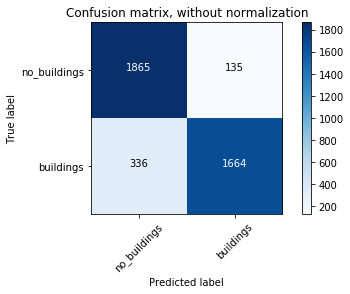

In [39]:
cnf_matrix = confusion_matrix(Y_test,Y_preds)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['no_buildings','buildings'],
                      title='Confusion matrix, without normalization')

In [ ]:
# list(zip(Y_test,Y_preds))
# import pandas as pd

In [40]:
history.history

{'acc': [0.58164062500000002,
  0.70718749999999997,
  0.75070312500000003,
  0.7784375,
  0.79789062499999996,
  0.81312499999999999,
  0.82984374999999999,
  0.83734375000000005,
  0.85406249999999995,
  0.86679687500000002,
  0.892578125,
  0.89531249999999996,
  0.89531249999999996,
  0.89664062499999997,
  0.89585937500000001,
  0.89789062500000005,
  0.89867187500000001,
  0.90023437500000003,
  0.90046875000000004,
  0.89968749999999997],
 'loss': [0.66634855955839156,
  0.56173957467079161,
  0.50071847751736642,
  0.46583586230874063,
  0.43469909444451332,
  0.41101465046405794,
  0.38399538613855838,
  0.36382403559982779,
  0.33135096952319143,
  0.30799778982996939,
  0.25623247656971215,
  0.25242082234472035,
  0.24908098392188549,
  0.24682140920311213,
  0.24398459345102311,
  0.24360088452696801,
  0.23945419497787954,
  0.23867941241711377,
  0.23698234681040048,
  0.23459551446139812],
 'val_acc': [0.4896875,
  0.48999999999999999,
  0.57656249999999998,
  0.5,
  0.

In [41]:
len(history.history['acc'])

20

In [42]:
HISTORY = pd.DataFrame(history.history)
HISTORY

,acc,loss,val_acc,val_loss
0,0.581641,0.666349,0.489687,0.805465
1,0.707187,0.561740,0.490000,0.977874
2,0.750703,0.500718,0.576562,0.641057
3,0.778438,0.465836,0.500000,0.907897
4,0.797891,0.434699,0.515000,0.874906
5,0.813125,0.411015,0.617812,0.655697
6,0.829844,0.383995,0.739375,0.491631
7,0.837344,0.363824,0.770000,0.451890
8,0.854062,0.331351,0.825313,0.374546
9,0.866797,0.307998,0.884687,0.285815


In [43]:
### SAVE HISTORY!!

# HISTORY.to_csv(path+'/building_set/XY_ubdnb6000_model_v3History.csv')
HISTORY.to_csv('./model/XY_traintest_model_v3.1a_20epHistory.csv')

In [44]:
import seaborn as sns

/usr/local/lib/python3.4/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


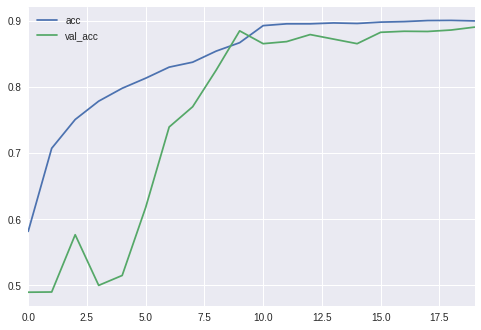

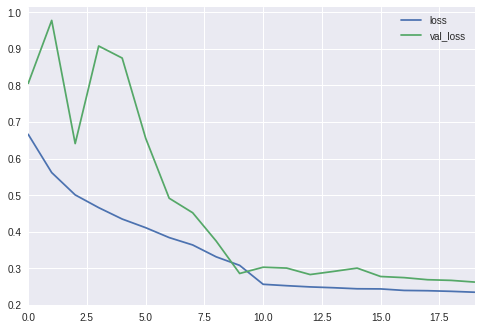

In [45]:

HISTORY.plot(y=['acc','val_acc'])
HISTORY.plot(y=['loss','val_loss'])

In [46]:
Xtest.shape

(4000, 256, 256, 3)

In [47]:
Xtest[0].shape

(256, 256, 3)

In [48]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

0 0


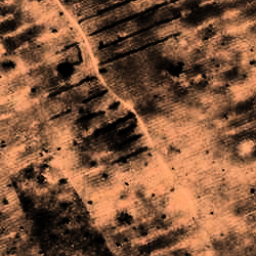

In [49]:
n=1440 #240 #1000 
print(Y_test[n], Y_preds[n])
array_to_img(Xtest[n]) 


1 1


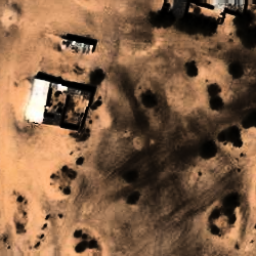

In [51]:
n=300 #1000
print(Y_test[n], Y_preds[n])
array_to_img(Xtest[n]) 


### Test Hold-out data -------------------------------------------------------------------------------------------------------

In [52]:
XHold = np.load(path+'/building_set/X_holdout_all'+'.npy')
YHold = np.load(path+'/building_set/Y_holdout_all'+'.npy')
print(XHold.shape, YHold.shape)


(4400, 256, 256, 3) (4400, 2)


In [54]:
YHoldpreds = model.predict(XHold, verbose=1)

In [63]:
print("Validation Log Loss: {}".format(log_loss(YHold, YHoldpreds)))  

#post 20epochs --- TrainTest Validation Log Loss: 0.2793
# Holdout Validation Log Loss: 0.19956

Validation Log Loss: 0.19956457366116456


In [ ]:
Y_Hpreds = convertKerasY21Darray(YHoldpreds)
Y_Htest = convertKerasY21Darray(YHold)

In [64]:
accuracy_score(Y_Htest, Y_Hpreds)

#post 20epochs ---Holdout  Accuracy : 0.934

0.93409090909090908

In [57]:
pd.DataFrame(Y_Htest, columns=['B']).B.value_counts()

0    4000
1     400
Name: B, dtype: int64

In [58]:
print (classification_report(Y_Htest,Y_Hpreds,target_names = ['no_buildings','buildings']) )

              precision    recall  f1-score   support

no_buildings       0.98      0.95      0.96      4000
   buildings       0.60      0.80      0.69       400

 avg / total       0.95      0.93      0.94      4400



1 1


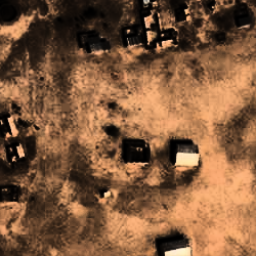

In [65]:
n=123 #240 #1000 
print(Y_Htest[n], Y_Hpreds[n])
array_to_img(XHold[n]) 


0 0


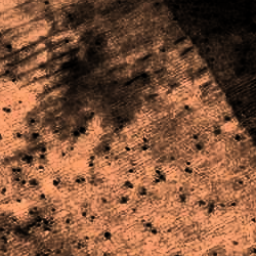

In [66]:
 n=789 #240 #1000 
print(Y_Htest[n], Y_Hpreds[n])
array_to_img(XHold[n])


### Test LOAD Model/Weights

In [ ]:
# from keras import backend as K
# import tensorflow as tf
# from keras.layers import merge
# from keras.layers.core import Lambda

from keras.models import Model
from keras.models import load_model
M = cnn_model()

In [108]:
M.load_weights('./model/model_v3.1a.h5')

In [139]:
# M.summary()

In [111]:
Y0preds = M.predict(Xtest, verbose=1)
print("Validation Log Loss: {}".format(log_loss(Ytest, Y0preds)))

4000/4000 [==============================] - 61s     

In [112]:
Y0_preds = convertKerasY21Darray(Y0preds)
accuracy_score(Y_test, Y0_preds) 

0.88224999999999998

In [135]:
# M.save('./model/modelNweights_v3.1a.h5') #didn't save properly -- so load model_def & model.load(weights)

In [141]:
cnn_M = cnn_model()

In [145]:
cnn_M.save('./model/CNNmodelNOweights_3diffconvkerns.h5')

### TRY further training ---  NOT MUCH Better...   
http://machinelearningmastery.com/save-load-keras-deep-learning-models/

In [61]:
# filepath='./model/model_v3.1a.h5' #XY_traintest_all
filepath='./model/model_v3.1b.h5' #XY_traintest_all

# filepath = input()

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max') 
history = History() ##oops overwrote the previous 'history' here - but it was saved as csv

early_stopping = EarlyStopping(monitor='val_loss', verbose=1, patience=4, mode='auto')  #patience=3
        

In [ ]:
batch_size = 64 #32
nb_epoch = 20 #10 

def lr_schedule(epoch):
    return lr*(0.1**int(epoch/10))


model.fit(Xtrain, Ytrain, batch_size=batch_size, epochs=nb_epoch,
            validation_split=0.2, shuffle=True, 
          callbacks=[LearningRateScheduler(lr_schedule),
                    early_stopping,checkpoint, history]          
          #callbacks=[early_stopping, checkpoint, history]
         )

Train on 12800 samples, validate on 3200 samples
Epoch 1/20
12800/12800 [==============================] - 1128s - loss: 0.2715 - acc: 0.8867 - val_loss: 0.2552 - val_acc: 0.9022
Epoch 2/20
12800/12800 [==============================] - 1136s - loss: 0.2550 - acc: 0.8934 - val_loss: 0.2434 - val_acc: 0.9053
Epoch 3/20
12800/12800 [==============================] - 1133s - loss: 0.2368 - acc: 0.9012 - val_loss: 0.2362 - val_acc: 0.9131
Epoch 4/20
12800/12800 [==============================] - 1124s - loss: 0.2033 - acc: 0.9171 - val_loss: 0.2310 - val_acc: 0.9106
Epoch 7/20
12800/12800 [==============================] - 1123s - loss: 0.1976 - acc: 0.9194 - val_loss: 0.3458 - val_acc: 0.8584
Epoch 8/20
12800/12800 [==============================] - 1137s - loss: 0.1841 - acc: 0.9248 - val_loss: 0.2132 - val_acc: 0.9206
Epoch 9/20
12800/12800 [==============================] - 1123s - loss: 0.1748 - acc: 0.9313 - val_loss: 0.2276 - val_acc: 0.9141
Epoch 10/20
12800/12800 [================

In [67]:
len(history.history['acc'])

13

In [68]:
HISTORY2 = pd.DataFrame(history.history)
HISTORY2

,acc,loss,val_acc,val_loss
0,0.886719,0.271523,0.902188,0.255232
1,0.893359,0.255027,0.905312,0.243446
2,0.901172,0.236808,0.913125,0.236228
3,0.906406,0.227262,0.900000,0.243086
4,0.910156,0.216154,0.916250,0.220142
5,0.917109,0.203255,0.910625,0.230988
6,0.919375,0.197556,0.858437,0.345775
7,0.924844,0.184132,0.920625,0.213222
8,0.931328,0.174766,0.914062,0.227572
9,0.934141,0.170185,0.911250,0.235003


In [69]:
HISTORY2.to_csv('./model/XY_traintest_model_v3.1b_20ep13epHistory.csv')

In [72]:
allHISTORY = pd.concat([HISTORY,HISTORY2]).reset_index()
allHISTORY

,index,acc,loss,val_acc,val_loss
0,0,0.581641,0.666349,0.489687,0.805465
1,1,0.707187,0.561740,0.490000,0.977874
2,2,0.750703,0.500718,0.576562,0.641057
3,3,0.778438,0.465836,0.500000,0.907897
4,4,0.797891,0.434699,0.515000,0.874906
5,5,0.813125,0.411015,0.617812,0.655697
6,6,0.829844,0.383995,0.739375,0.491631
7,7,0.837344,0.363824,0.770000,0.451890
8,8,0.854062,0.331351,0.825313,0.374546
9,9,0.866797,0.307998,0.884687,0.285815


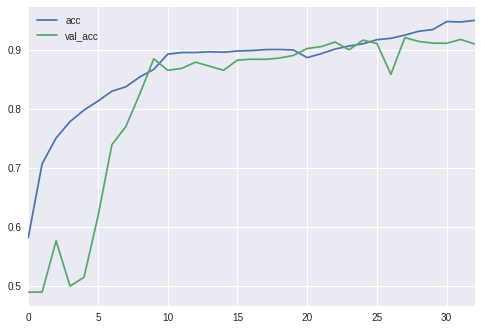

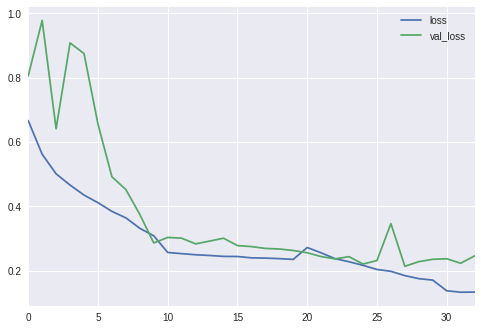

In [73]:
allHISTORY.plot(y=['acc','val_acc'])
allHISTORY.plot(y=['loss','val_loss'])

In [74]:
Y2preds = model.predict(Xtest, verbose=1)
print("Validation Log Loss: {}".format(log_loss(Ytest, Y2preds)))

4000/4000 [==============================] - 61s     

In [75]:
Y2_preds = convertKerasY21Darray(Y2preds)
# Y_test = convertKerasY21Darray(Ytest)

In [78]:
accuracy_score(Y_test, Y2_preds)

0.89649999999999996

In [76]:
print (classification_report(Y_test,Y2_preds,target_names = ['no_buildings','buildings']) )

              precision    recall  f1-score   support

no_buildings       0.94      0.84      0.89      2000
   buildings       0.86      0.95      0.90      2000

 avg / total       0.90      0.90      0.90      4000



In [77]:
Y2Holdpreds = model.predict(XHold, verbose=1)
print("Validation Log Loss: {}".format(log_loss(YHold, Y2Holdpreds))) 

4400/4400 [==============================] - 67s     

In [79]:
Y2_Hpreds = convertKerasY21Darray(Y2Holdpreds)
# Y_Htest = convertKerasY21Darray(YHold)

In [80]:
accuracy_score(Y_Htest, Y2_Hpreds)

0.87363636363636366

In [81]:
print (classification_report(Y_Htest,Y2_Hpreds,target_names = ['no_buildings','buildings']) )

              precision    recall  f1-score   support

no_buildings       0.99      0.87      0.93      4000
   buildings       0.41      0.93      0.57       400

 avg / total       0.94      0.87      0.89      4400

